### plot behavioural results

In [93]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
df = pd.read_csv('../data/fmri_behavioural_new.csv')

In [46]:
dfna = df.dropna(subset=['obs_p1g2', 'obs_p2g1'], how='all')

In [47]:
dfna.shape

(2104, 17)

In [222]:
dfm1 = dfna[['gen_p1g2', 'obs_p1g2','subject']].dropna()
dfm11 = dfm1.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm11['subject'] = dfm1['subject']
dfm11['Generative p(L|H)'] = dfm11['gen_p1g2']
dfm11['Rated p(L|H)'] = dfm11['obs_p1g2']
stats.pearsonr(dfm11['Generative p(L|H)'], dfm11['Rated p(L|H)'])

(0.13139930964025162, 3.589510548475801e-05)

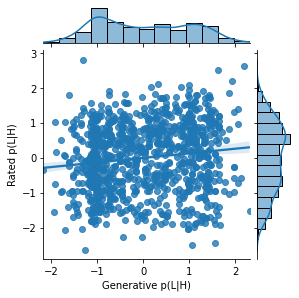

In [227]:
g = sns.jointplot(data=dfm11, x='Generative p(L|H)', y='Rated p(L|H)', kind='reg')#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p1g2.png', bbox_inches='tight')

In [224]:
# sns.lmplot(data=dfna, x='gen_p1g2', y='obs_p1g2', hue='subject')

In [228]:
dfm2 = dfna[['gen_p2g1', 'obs_p2g1', 'subject']].dropna()
dfm22 = dfm2.groupby(['subject']).transform(lambda x: (x - x.mean()) / x.std())
dfm22['subject'] = dfm2['subject']
dfm22['Generative p(H|L)'] = dfm22['gen_p2g1']
dfm22['Rated p(H|L)'] = dfm22['obs_p2g1']
stats.pearsonr(dfm22['Generative p(H|L)'], dfm22['Rated p(H|L)'])

(0.1187039171573626, 6.775759665809192e-05)

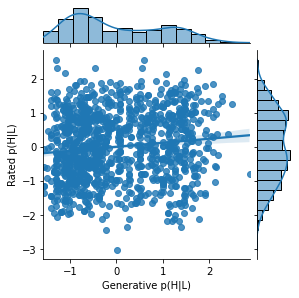

In [229]:
g = sns.jointplot(data=dfm22, x='Generative p(H|L)', y='Rated p(H|L)', kind='reg')#color="#4CB391", 
g.fig.set_figwidth(4)
g.fig.set_figheight(4)
plt.savefig('./figs/p2g1.png', bbox_inches='tight')

In [230]:
dfm11_r = dfm11.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(L|H)'], x['Rated p(L|H)'])[0])

In [231]:
dfm22_r = dfm22.groupby('subject').apply(lambda x: stats.pearsonr(x['Generative p(H|L)'], x['Rated p(H|L)'])[0])

In [232]:
dfm_sj = pd.DataFrame({'P(L|H)': dfm11_r, 'P(H|L)': dfm22_r})

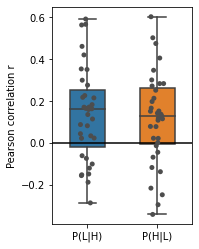

In [236]:
plt.subplots(figsize=(2.5,4))
g = sns.boxplot(data=dfm_sj, width=0.5)
g = sns.stripplot(data=dfm_sj, color='.3')
plt.axhline(0, color='k')
plt.ylabel('Pearson correlation r')
plt.savefig('./figs/genobs_pcorr.png', bbox_inches='tight')

In [238]:
stats.ttest_1samp(dfm_sj, 0)

Ttest_1sampResult(statistic=array([3.64507447, 3.14656053]), pvalue=array([0.00088388, 0.00342618]))